In [1]:
%display latex

Intentando hacerlo desde cero

In [2]:
var('B_b B_0 beta rho z r theta')

(B_b, B_0, beta, rho, z, r, theta)

In [3]:
Bz1=B_b+(B_0)*(1-beta*z)^(1/2)

In [4]:
phiz=-Bz1.integral(z)

In [5]:
phizt=phiz.taylor(z,0,105)

In [6]:
Phi=sum(r^(k)*legendre_P(k,cos(theta))*phizt.coefficient(z,k) for k in [0..46])

In [7]:
Br=-derivative(Phi,r) 
Bth=-((1/r)*derivative(Phi,theta))

In [8]:
Brho=Br*sin(theta)+Bth*cos(theta)
Bz=Br*cos(theta)-Bth*sin(theta)

In [9]:
Brho=Brho(r=sqrt(rho^2+z^2),theta=arctan(rho/z)) 
Bz=Bz(r=sqrt(rho^2+z^2),theta=arctan(rho/z))

In [10]:
from sage.ext.fast_eval import fast_float
Brho_num=fast_float(Brho,'B_b','B_0', 'beta','rho','z',old=True)
Bz_num=fast_float(Bz,'B_b','B_0', 'beta', 'rho','z',old=True)

In [11]:
import numpy as np
z_vals=np.arange(0,2,0.001)

Los datos fueron extraidos del artículo usando (qué software??) y ajustados usando Matlab para hallar:
$$ B_{b}=11.5\, [mA] \quad, \quad B_0=126.4 \,[mA] \quad, \quad \beta=0.7685 \, [m^{-1}] $$
y según el artículo $\rho=0.025\,[m]$

In [12]:
Brho_f=[Brho_num(11.5,126.4,0.7685,0.025,i) for i in z_vals]
Bz_f=[Bz_num(11.5,126.4,0.7685,0,i) for i in z_vals]

In [13]:
import pylab as plt
import pandas as pd
import numpy as np

# Para $B_{z}$

In [14]:
data = pd.read_csv('datosZ1.csv')
data

Z       BZ
0    20.001  120.065
1    22.500  120.191
2    25.095  120.285
3    27.483  119.442
4    29.967  118.850
5    32.546  118.319
6    34.871  117.258
7    37.546  116.447
8    40.014  115.198
9    42.545  114.043
10   45.013  112.732
11   47.497  111.639
12   50.029  110.235
13   52.417  108.830
14   54.901  107.394
15   57.416  106.082
16   59.900  104.521
17   62.416  102.773
18   65.011  101.368
19   67.511   99.776
20   69.931   98.090
21   72.511   96.404
22   74.963   94.531
23   77.542   92.720
24   79.994   90.940
25   82.478   88.942
26   84.994   86.944
27   87.541   84.852
28   90.009   82.478
29   92.509   80.230
30   94.993   78.045
31   97.445   75.422
32  100.009   72.549
33  102.604   69.895
34  104.977   67.365
35  107.445   63.930
36  110.009   60.370
37  112.509   56.373
38  115.057   52.219
39  117.541   47.035
40  120.105   40.445
41  122.542   31.701
42  125.107   19.863
43  127.560   11.212
44  130.060    7.027

In [15]:
zd = data.Z.tolist()
zd = np.array(zd)

Bzd = data.BZ.tolist()
Bzd= np.array(Bzd)

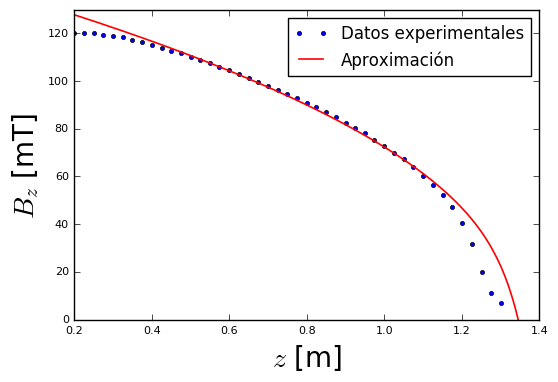

In [16]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(zd*0.01,Bzd,marker='o',markersize=3,label='Datos experimentales',linestyle='')
plt.plot(z_vals,Bz_f,color='red',linewidth=1.2,label="Aproximaci" u"ón")
plt.xlabel(r'$z$ [m]')
plt.xlim((0.2, 1.4))
plt.ylabel(r'$B_z$ [mT] ')
plt.ylim((0, 130))
plt.legend()
plt.savefig('Bz_ZC.png', format='png', dpi=1000)
plt.show()

# Para $B_{\rho}$

In [18]:
data1 = pd.read_csv('datosRHO2.csv')
data1

Z    BRHO
0    39.960  0.5474
1    42.464  0.5935
2    45.005  0.6302
3    47.457  0.6532
4    49.962  0.6804
5    52.467  0.7075
6    54.972  0.7333
7    57.477  0.7455
8    59.946  0.7645
9    62.433  0.7808
10   65.010  0.8053
11   67.479  0.8202
12   69.913  0.8392
13   72.400  0.8610
14   74.941  0.9003
15   77.606  0.9288
16   79.933  0.9654
17   82.473  1.0020
18   84.978  1.0346
19   87.536  1.0834
20   90.077  1.1241
21   92.493  1.1756
22   94.926  1.2326
23   97.538  1.2909
24   99.918  1.3573
25  102.405  1.4346
26  104.962  1.5349
27  107.395  1.6569
28  109.952  1.8250
29  112.438  2.0608
30  114.940  2.3955
31  117.405  2.9254
32  119.974  3.7926

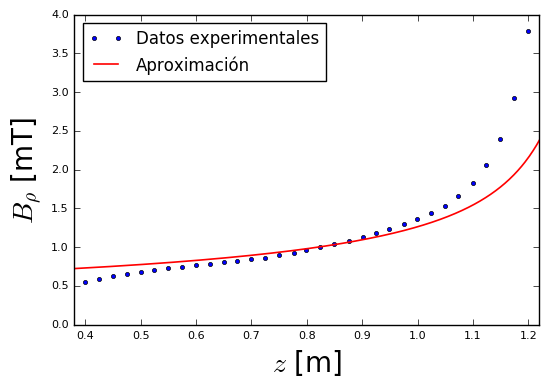

In [19]:
zd2 = data1.Z.tolist()
zd2 = np.array(zd2)

Brhod = data1.BRHO.tolist()
Brhod= np.array(Brhod)

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

fig=plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.plot(zd2*0.01,Brhod,marker='o',markersize=3,label='Datos experimentales', linestyle='')
plt.plot(z_vals,Brho_f,color='red',label="Aproximaci"u"ón",linewidth=1.2)

plt.xlabel(r'$z$ [m]')
plt.xlim((0.38, 1.22))
plt.ylabel(r'$B_{\rho}$ [mT]')
plt.ylim((0, 4))
plt.legend(loc=2)
plt.savefig('Brho_ZC.png', format='png', dpi=1000)
plt.show()

#

# Usando la expresión analítica derivada en el artículo (ya no es necesario). Se deja la comparación para un futuro

In [ ]:
import numpy as np
import pylab as plt
from IPython.display import Latex

In [ ]:
Latex(r"""
\begin{equation}
B_{\rho}=-\frac{B_0}{\sqrt{\pi}} \sum_{n=2}^{\infty} \frac{\beta^{n-1}\Gamma{\left( n-\frac{1}{2}\right)}}{(n-1)!(2n-3)} \frac{\left(\sqrt{z^2+\rho^2}\right)^{n}}{\rho}\left[ P_{n}\left(\frac{z}{\sqrt{z^2+\rho^2}}\right)- \frac{z}{\sqrt{z^2+\rho^2}} P_{n-1}\left(\frac{z}{\sqrt{z^2+\rho^2}}\right) \right]
\end{equation}
""")

In [ ]:
Latex(r"""
\begin{equation}
B_{z}= (B_b + B_0) -\frac{B_0}{\sqrt{\pi}} \sum_{n=2}^{\infty} \frac{\beta^{n-1}\Gamma{\left( n-\frac{1}{2}\right)}}{(n-1)!(2n-3)}  \left(\sqrt{z^2+\rho^2}\right)^{n-1} P_{n-1}\left(\frac{z}{\sqrt{z^2+\rho^2}}\right) 
\end{equation}
""")

In [ ]:
var('B_b B_0 beta rho z r theta')

Cambiando $z$ por $x$ para evitar conflictos con lo anterior

In [ ]:
Brhos=-((B_0)/sqrt(pi))*sum((( beta^(n-1)*gamma(n-1/2))/(factorial(n-1)*(2*n-3))*((((sqrt(x^2+rho^2))^(n))/(rho)))*(legendre_P(n,(x)/(sqrt(x^2+rho^2)))- ((x)/(sqrt(x^2+rho^2)))*legendre_P(n-1,(x)/(sqrt(x^2+rho^2))))) for n in [2..20] )

In [ ]:
#Brhos

## Graficando $B_{\rho}$

In [ ]:
Brhos_num=fast_callable(Brhos,vars=('B_0', 'beta','rho','x'))

In [ ]:
x_vals=np.arange(0.2,2,0.001)
Brhos_f=[Brhos_num(132.8,0.544,0.025,i) for i in x_vals]

In [ ]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)


plt.plot(x_vals,Brhos_f,color='red')
plt.xlabel(r'$z$ [m]')
#plt.xlim((0.2, 1.3))
plt.ylabel(r'$B_{\rho}$[mA] ')
#plt.ylim((0, 130))
plt.savefig('B_rho anali.png', format='png', dpi=1000)
plt.show()

Hay un problema como de unidades

## Graficando $B_{z}$

In [ ]:
Bzs=(B_b+B_0)-((B_0)/sqrt(pi))*sum(((beta^(n-1)*gamma(n-1/2))/(factorial(n-1)*(2*n-3)))*(((sqrt(x^2+rho^2))^(n-1)))*legendre_P(n-1,x/(sqrt(x^2+rho^2))) for n in [2..40])

In [ ]:
#Bzs

In [ ]:
Bzs_num=fast_callable(Bzs,vars=('B_b','B_0','beta','rho','x'))

In [ ]:
x_vals1=np.arange(0.2,2,0.01)
Bzs_f=[Bzs_num(27.6,132.8,0.544,0,i) for i in x_vals1]

In [ ]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)


plt.plot(x_vals1,Bzs_f,color='red')
plt.xlabel(r'$z$ [m]')
plt.xlim((0.2, 2))
plt.ylabel(r'$B_z$ [mA] ')
plt.ylim((0, 150))
plt.savefig('B_z anali.png', format='png', dpi=1000)
plt.show()

Tampoco da